<a href="https://colab.research.google.com/github/Rohan20202/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing the required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno 
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Connecting to the drive**

In [2]:
#connecting to the google drive
from google.colab import drive 
drive.mount ("/content/drive")

Mounted at /content/drive


**Loading the dataset**

In [3]:
data = pd.read_csv("/content/drive/MyDrive/bike rental prediction/SeoulBikeData.csv", encoding='ISO-8859-1')

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.shape

(8760, 14)

In [6]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [8]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Data Cleaning**

**Checking for null values**

In [10]:
pd.DataFrame(data.isna().sum(),columns=['records missings']).T

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
records missings,0,0,0,0,0,0,0,0,0,0,0,0,0,0


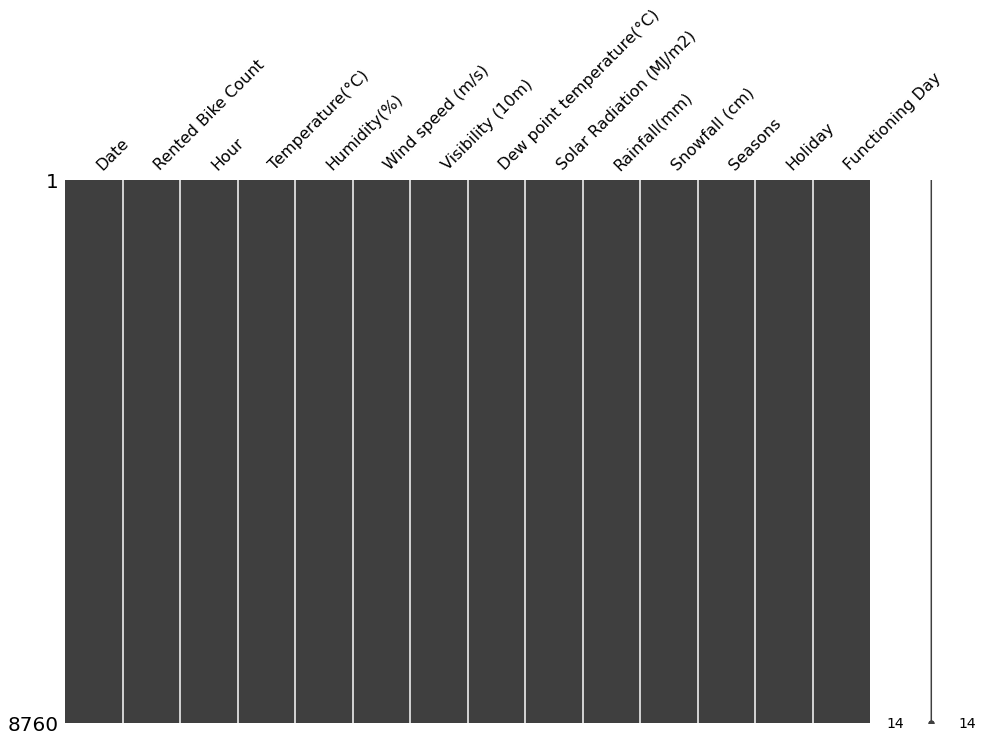

In [11]:
mno.matrix(data,figsize=(16,10))

In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_name'] = data['Date'].dt.day_name()

In [13]:
#dataframe after adding the columns
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_name
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday


**Data Visualization**

**Seprate dependent and independent variables**

In [14]:
dependent_variable = 'Rented Bike Count'

In [15]:
independent_variables = list(set(data.columns.tolist()) - {dependent_variable})
independent_variables

['Humidity(%)',
 'Functioning Day',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Dew point temperature(°C)',
 'Year',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Month',
 'Seasons',
 'Day_name',
 'Temperature(°C)',
 'Hour',
 'Holiday',
 'Visibility (10m)',
 'Date',
 'Day']

In [16]:
# Divide the columns based on the type for clear management
col_weather = ['Wind speed (m/s)' , 'Dew point temperature(°C)' , 'Visibility (10m)',
              'Solar Radiation (MJ/m2)' , 'Temperature(°C)' , 'Humidity(%)']

col_period = [ 'Day_name' , 'Date' , 'Day' , 'Hour' , 'Month' , 'Year' , 'Functioning Day' , 'Holiday' ]

col_season = ['Rainfall(mm)' , 'Seasons' , 'Snowfall (cm)']

col_target = ["Rented Bike Count"]

In [17]:
independent_vars = data[col_weather +col_period + col_season]
dependent_vars = data[col_target]

In [18]:
independent_vars.describe()

,Wind speed (m/s),Dew point temperature(°C),Visibility (10m),Solar Radiation (MJ/m2),Temperature(°C),Humidity(%),Day,Hour,Month,Year,Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,1.724909,4.073813,1436.825799,0.569111,12.882922,58.226256,15.720548,11.500000,6.526027,2017.915068,0.148687,0.075068
std,1.036300,13.060369,608.298712,0.868746,11.944825,20.362413,8.796749,6.922582,3.448048,0.278796,1.128193,0.436746
min,0.000000,-30.600000,27.000000,0.000000,-17.800000,0.000000,1.000000,0.000000,1.000000,2017.000000,0.000000,0.000000
25%,0.900000,-4.700000,940.000000,0.000000,3.500000,42.000000,8.000000,5.750000,4.000000,2018.000000,0.000000,0.000000
50%,1.500000,5.100000,1698.000000,0.010000,13.700000,57.000000,16.000000,11.500000,7.000000,2018.000000,0.000000,0.000000
75%,2.300000,14.800000,2000.000000,0.930000,22.500000,74.000000,23.000000,17.250000,10.000000,2018.000000,0.000000,0.000000
max,7.400000,27.200000,2000.000000,3.520000,39.400000,98.000000,31.000000,23.000000,12.000000,2018.000000,35.000000,8.800000


In [19]:
dependent_vars.describe()

,Rented Bike Count
count,8760.000000
mean,704.602055
std,644.997468
min,0.000000
25%,191.000000
50%,504.500000
75%,1065.250000
max,3556.000000


**Hitogram for all the features to understand the distribution**

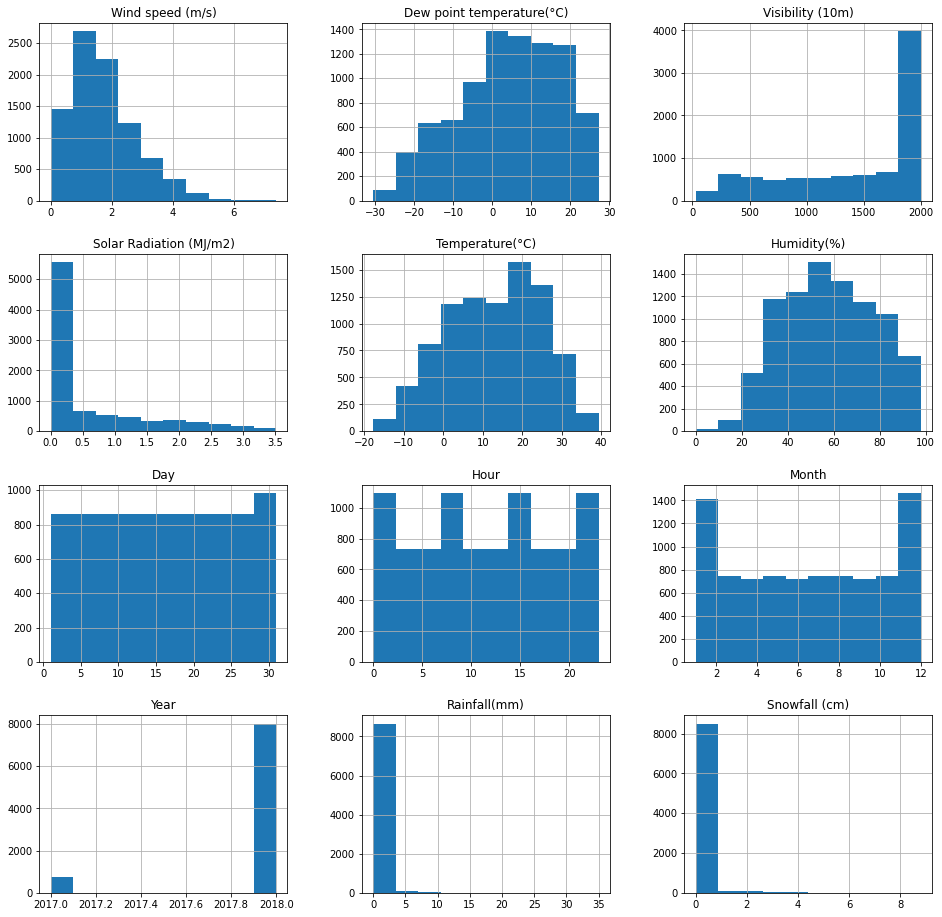

In [20]:
independent_vars.hist(figsize= (16,16))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5d85aff90>]],
      dtype=object)

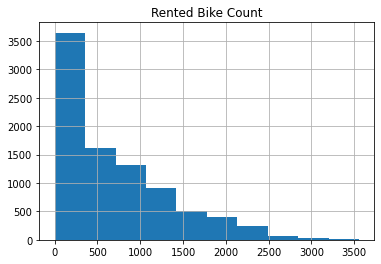

In [21]:
dependent_vars.hist()